# Quick viz demos

Requires:

    conda install vispy pyopengl
    pip install welly
    pip install decorator --upgrade


## Well log with `welly`

It's easy to make a series of data and plot it:

In [1]:
data = [23, 24, 21, 19, 17, 12, 19, 21, 25, 30, 32, 31, 28, 24]

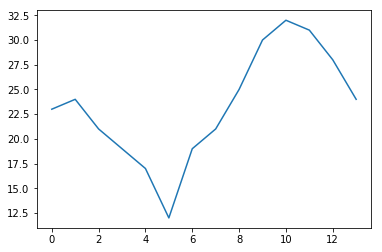

In [2]:
import matplotlib.pyplot as plt

plt.plot(data)

In [4]:
from welly import Well

w = Well.from_las('../data/L-30.las')

In [5]:
w

Well(uwi: '', 13 curves: ['CALD', 'CALS', 'DRHO', 'DT', 'GRD', 'GRS', 'ILD', 'ILM', 'LL8', 'NPHILS', 'NPHISS', 'RHOB', 'SP'])

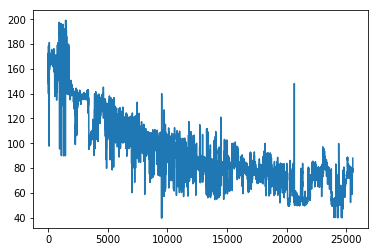

In [7]:
dt = w.data['DT']

plt.plot(dt)

But this plot is horizontal, and the x-axis is labeled with indices not depths. 

So these welly `Curve` objects have a `plot` method that takes care of some of these issues:

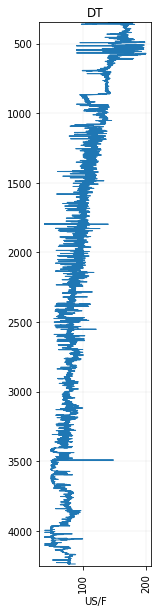

In [8]:
dt.plot()

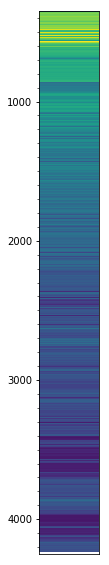

In [9]:
dt.plot_2d()

## Topo map

In [5]:
import numpy as np

import matplotlib.pyplot as plt

In [6]:
before = np.load('../data/st-helens_before.npy')
after = np.load('../data/st-helens_after.npy')

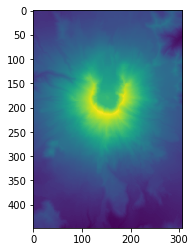

In [7]:
plt.imshow(after)
plt.show()

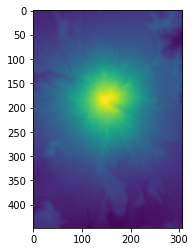

In [8]:
plt.imshow(before)

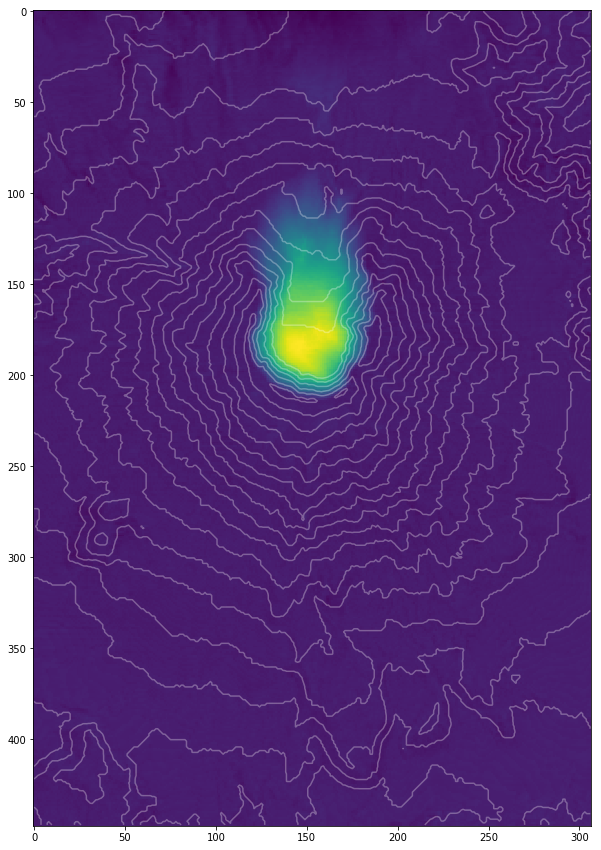

In [9]:
diff = before - after

plt.figure(figsize=(10, 15))
plt.imshow(diff, aspect='auto')
plt.contour(after,
            levels=np.arange(int(after.min()), after.max(), 100),
            linestyles='solid', colors=['white'], alpha=0.3)
plt.show()

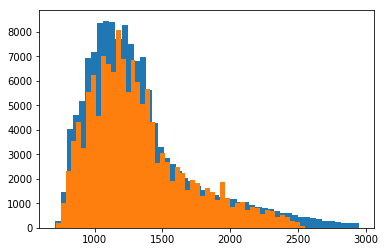

In [10]:
_ = plt.hist(before.flatten(), bins=50, lw=0)
_ = plt.hist(after.flatten(), bins=50, lw=0)

## Topo map surface with `mplot3d`

This makes a static 3D plot using `matplotlib`'s [`mplot3d` module](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html).

Quick plot with fewest parameters:

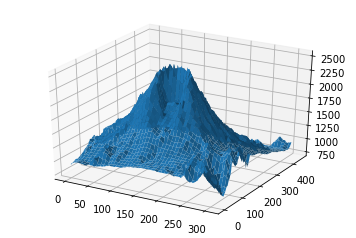

In [14]:
from mpl_toolkits.mplot3d import Axes3D

rcount, ccount = after.shape
x, y = np.arange(ccount), np.arange(rcount)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, after)
plt.show()

A bit nicer. You have to pass `rcount` and `ccount` otherwise it downsamples to 50 &times; 50.

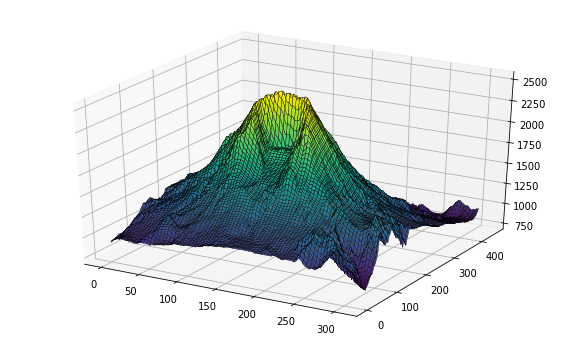

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, after, cmap='viridis', rcount=150, ccount=100, edgecolor='black', lw=0.33)
plt.show()

## Maps with `cartopy`

`basemap` is dead! Long live `cartopy`!

Except no... this doesn't work on macOS at least. Some sort of GEOS bug.

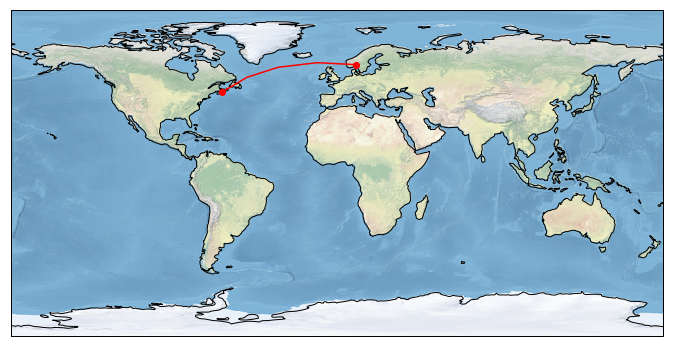

In [18]:
import cartopy.crs as ccrs

plt.figure(figsize=(12,6))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

yhz = 44.6488, -63.5752
osl = 59.9139,  10.7522

ax.plot([yhz[1], osl[1]], [yhz[0], osl[0]],
        'r-o',
        transform=ccrs.Geodetic()
       )

plt.show()

## Seismic volume with `ipyvolume`

**I haven't spent a lot of time on it, but this doesn't work well for me.**

First do this:

    conda install -c conda-forge ipywidgets
    conda install -c conda-forge ipyvolume
    
If you install with conda, then you should not need to do:

    jupyter nbextension enable --py --sys-prefix widgetsnbextension
    jupyter nbextension enable --py --user ipyvolume
    
**You also must launch the notebook from the conda env you installed in!**

In [19]:
data = np.load('../data/seismic.npy')

In [20]:
import ipyvolume.pylab as p3

In [21]:
fig = p3.figure()
p3.style.use('dark')
p3.volshow(data)
p3.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


A Jupyter Widget

## Seismic volume with `vispy`

In [ ]:
import vispy.plot as vp

In [ ]:
data = np.load('../data/seismic.npy')
fig = vp.Fig(show=False)
scene = fig[0, 0]
scene.volume(data, cmap='viridis', clim=[0, 2e4])
fig.show(run=True)